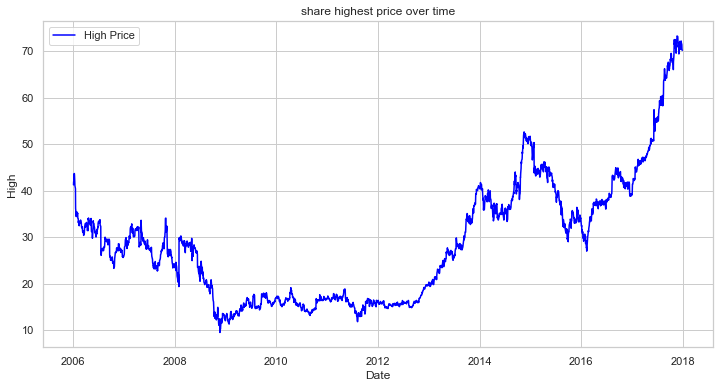

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("stock_data.csv",parse_dates=True,index_col="Date")
df.head()



###Line Plot
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Date',y='High',label='High Price',color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('share highest price over time')
plt.show()

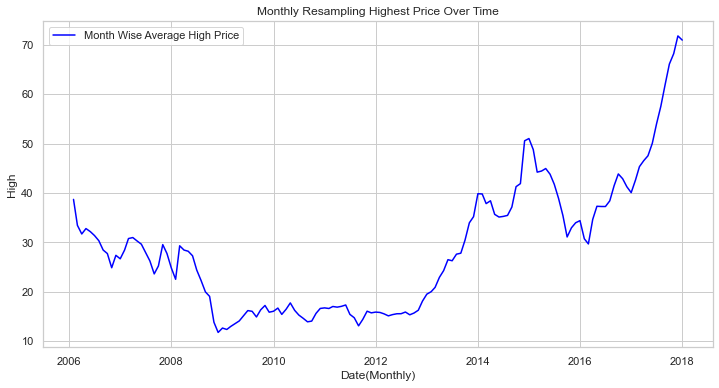

In [2]:
###Resampling
df_resampled = df.select_dtypes(include=[np.number]).resample('ME').mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=df_resampled,x=df_resampled.index,y='High',label='Month Wise Average High Price',color='blue')

plt.xlabel('Date(Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')
plt.show()

<Figure size 864x432 with 0 Axes>

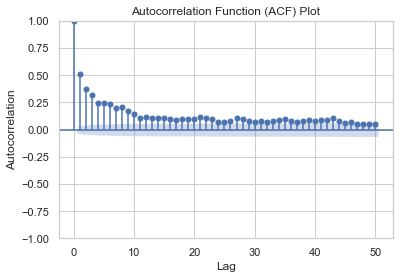

In [3]:
###Detecting Seasonality Using Auto Correlation
#df.set_index('Date',inplace=True)
df.index.name = 'Date'  # Set a name for the index if needed

plt.figure(figsize=(12,6))
plot_acf(df['Volume'],lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

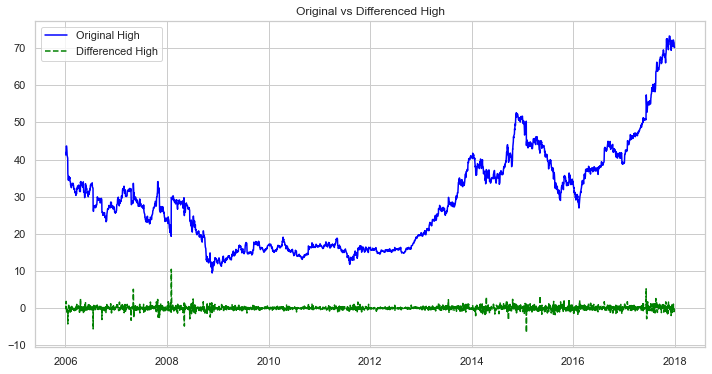

In [4]:
# Differencing
df['high_diff'] = df['High'].diff()
 
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

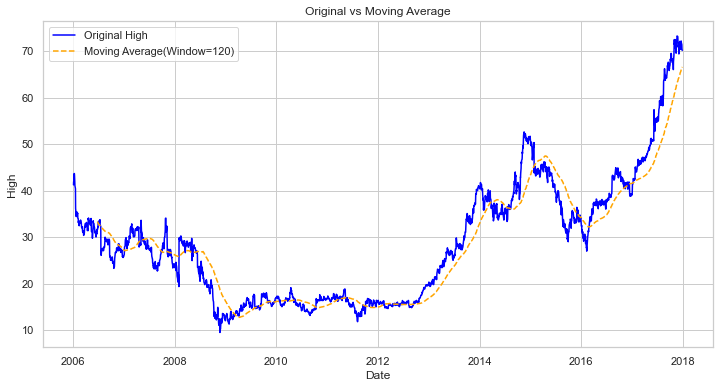

In [5]:
### Original vs Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(12,6))
plt.plot(df['High'],label='Original High',color='blue')
plt.plot(df['high_smoothed'],label =f'Moving Average(Window={window_size})',linestyle='--',color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()